In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve

breastCancerData = pd.read_csv('./DataSets/breastcancerwisconsin/breast-cancer-wisconsin.data', na_values=["?"])
wdbc = pd.read_csv('./DataSets/breastcancerwisconsin/wdbc.data')

### Research Question: Can we Classification ML Models to accurately predict if a rbeast cancer tumor is malignant or benign?

### Testing

**Data Science Steps:**
1) Acquire
2) Prepare
3) Analyze
4) Report
5) Act

# Abstract

This study aims to answer the question "Can we use Machine Learning Models to accurately predict if a breast tumor mass is malignant or benign", specifically using the "Breast Cancer Wisconsin (Diagnostic) Data Set" collected by Dr. William H. Wolberg. 

Using Machine Learning Classification Models, including Decision Tree and Random Forest, four models were created in order to predict whether or not a tumor is malignant or benign. Two different models were created for each type of classifier (Decision Tree vs Random Forest), the difference between the two models is the impurity measure used (Gini vs Entropy). The impurity measure was used to determine the splitting of the data. 

All Machine Learning Models created had an accuracy score of over 94%, as well as very high AUC scores, denoting that the models performed very well against testing data.


**WDBC feature list:**
* ID
* Diagnosis
* Mean, stderr, and max extreme was retrieved for the following features: 
    * Radius 
    * Texture
    * Perimeter
    * Area
    * Smoothness
    * Compactness
    * Concavity
    * Concave Points
    * Symmetry
    * Fractal Dimension
* NOTE: Extreme was calcculated by the mean of the three largest values
* Total: 32 Features

**Breast-cancer-wisconsin feature list:** 
* Sample Code Number
* Class: (2 for benign, 4 for malignant)
* The following features have been scaled 1-10 for intensity
    * Clump Thickness
    * Uniformity of Cell Size
    * Uniformity of Cell Shape
    * Marginal Adhesion
    * Single Epithelial Cell Size
    * Bare Nuclei
    * Bland Chromatin
    * Normal Nucleoli
    * Mitoses
* Total: 11 Features

# Motivation:

"With 281,550 new cases of breast cancer estimated to be reported in 2021, Breast Cancer is the most commonly diagnosed cancer among American Women... Over 43,600 women are expected to die in 2021 from breast cancer".

                                                            - U.S. Breast Cancer Statistics (breastcancer.org)

With the substantial amount of breast cancer in human lives today, it is the responsibility of our society that we find a way to mitigate the mortality rate of breast cancer. 

The early diagnosis of cancer is one of the only ways to have a better chance of having successful treatment. As such, it is imperative that we identify easier/faster/more efficient ways to identify if a woman has a malignant or benign cancer tumor. 

### Things I've done to the data: 

**breastCancerData:**
* Added column names to the breast-cancer-wisconsin.data dataframe
* Fixed the dataframe to include the one row that was read as column names initially, breastCancerData should have a total of 699 rows before removing anything
* Removed null values from the breast-cancer-wisconsin.data dataframe

**wdbc:**
* Added column names 
* Fixed the dataframe to include the one row that was read as column names initially, there should be a total of 569 rows
* Deleted "ID number" column since we won't need it

# WDBC SECTION
### Data Cleaning

In [11]:
#Adding Columns
wdbc.columns = ['ID number', 'Diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

In [12]:
wdbc.loc[0]

ID number                    842517
Diagnosis                         M
radius_mean                   20.57
texture_mean                  17.77
perimeter_mean                132.9
area_mean                    1326.0
smoothness_mean             0.08474
compactness_mean            0.07864
concavity_mean               0.0869
concave_points_mean         0.07017
symmetry_mean                0.1812
fractal_dimension_mean      0.05667
radius_se                    0.5435
texture_se                   0.7339
perimeter_se                  3.398
area_se                       74.08
smoothness_se              0.005225
compactness_se              0.01308
concavity_se                 0.0186
concave_points_se            0.0134
symmetry_se                 0.01389
fractal_dimension_se       0.003532
radius_worst                  24.99
texture_worst                 23.41
perimeter_worst               158.8
area_worst                   1956.0
smoothness_worst             0.1238
compactness_worst           

In [4]:
#Adding top column
wdbc.loc[len(wdbc.index)] = [842302, 'M', 17.99, 10.38, 122.8, 1001, 011.84, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189]

In [5]:
wdbcCopy = wdbc.copy()

In [6]:
#Deleted ID number column since we won't need it
del wdbcCopy['ID number']

In [7]:
wdbc.info()
#See that there are no nulls

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID number                569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Data Exploration

In [8]:
wdbcCopy.head()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [9]:
wdbcCopy.shape

(569, 31)

In [10]:
#Number of Malignant Tumors in our DataSet
len(wdbcCopy[wdbcCopy['Diagnosis'] == 'M'].index)

212

In [11]:
#Number of Benign Tumors in our DataSet
len(wdbcCopy[wdbcCopy['Diagnosis'] == 'B'].index)

357

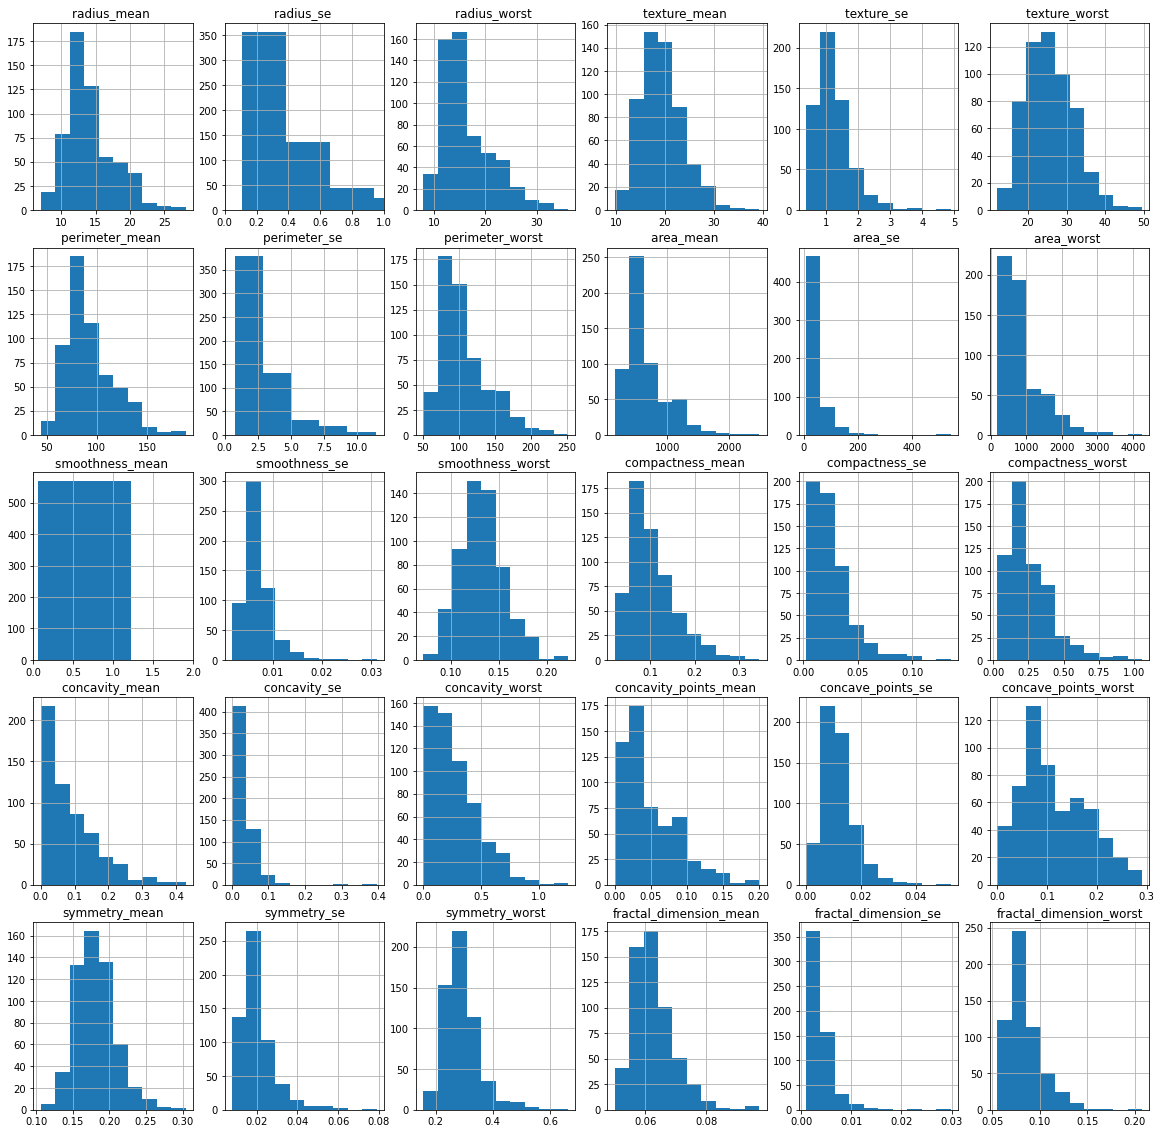

In [12]:
#Data Exploration, checking distributions of various features

fig, axs = plt.subplots(5, 6, figsize=(20,20))
axs[0, 0].hist(wdbcCopy['radius_mean'])
axs[0, 0].grid()
axs[0, 0].title.set_text('radius_mean ')

axs[0, 1].hist(wdbcCopy['radius_se'])
axs[0, 1].grid()
axs[0, 1].title.set_text('radius_se ')
axs[0, 1].set_xlim(0, 1)

axs[0, 2].hist(wdbcCopy['radius_worst'])
axs[0, 2].grid()
axs[0, 2].title.set_text('radius_worst ')

axs[0, 3].hist(wdbcCopy['texture_mean'])
axs[0, 3].grid()
axs[0, 3].title.set_text('texture_mean ')

axs[0, 4].hist(wdbcCopy['texture_se'])
axs[0, 4].grid()
axs[0, 4].title.set_text('texture_se ')

axs[0, 5].hist(wdbcCopy['texture_worst'])
axs[0, 5].grid()
axs[0, 5].title.set_text('texture_worst ')

axs[1, 0].hist(wdbcCopy['perimeter_mean'])
axs[1, 0].grid()
axs[1, 0].title.set_text('perimeter_mean ')

axs[1, 1].hist(wdbcCopy['perimeter_se'])
axs[1, 1].grid()
axs[1, 1].title.set_text('perimeter_se ')
axs[1, 1].set_xlim(0, 12)

axs[1, 2].hist(wdbcCopy['perimeter_worst'])
axs[1, 2].grid()
axs[1, 2].title.set_text('perimeter_worst ')

axs[1, 3].hist(wdbcCopy['area_mean'])
axs[1, 3].grid()
axs[1, 3].title.set_text('area_mean ')

axs[1, 4].hist(wdbcCopy['area_se'])
axs[1, 4].grid()
axs[1, 4].title.set_text('area_se ')

axs[1, 5].hist(wdbcCopy['area_worst'])
axs[1, 5].grid()
axs[1, 5].title.set_text('area_worst ')

axs[2, 0].hist(wdbcCopy['smoothness_mean'])
axs[2, 0].grid()
axs[2, 0].title.set_text('smoothness_mean ')
axs[2, 0].set_xlim(0, 2)

axs[2, 1].hist(wdbcCopy['smoothness_se'])
axs[2, 1].grid()
axs[2, 1].title.set_text('smoothness_se ')

axs[2, 2].hist(wdbcCopy['smoothness_worst'])
axs[2, 2].grid()
axs[2, 2].title.set_text('smoothness_worst ')

axs[2, 3].hist(wdbcCopy['compactness_mean'])
axs[2, 3].grid()
axs[2, 3].title.set_text('compactness_mean ')

axs[2, 4].hist(wdbcCopy['compactness_se'])
axs[2, 4].grid()
axs[2, 4].title.set_text('compactness_se ')

axs[2, 5].hist(wdbcCopy['compactness_worst'])
axs[2, 5].grid()
axs[2, 5].title.set_text('compactness_worst ')

axs[3, 0].hist(wdbcCopy['concavity_mean'])
axs[3, 0].grid()
axs[3, 0].title.set_text('concavity_mean ')

axs[3, 1].hist(wdbcCopy['concavity_se'])
axs[3, 1].grid()
axs[3, 1].title.set_text('concavity_se ')

axs[3, 2].hist(wdbcCopy['concavity_worst'])
axs[3, 2].grid()
axs[3, 2].title.set_text('concavity_worst ')

axs[3, 3].hist(wdbcCopy['concave_points_mean'])
axs[3, 3].grid()
axs[3, 3].title.set_text('concavity_points_mean ')

axs[3, 4].hist(wdbcCopy['concave_points_se'])
axs[3, 4].grid()
axs[3, 4].title.set_text('concave_points_se ')

axs[3, 5].hist(wdbcCopy['concave_points_worst'])
axs[3, 5].grid()
axs[3, 5].title.set_text('concave_points_worst ')

axs[4, 0].hist(wdbcCopy['symmetry_mean'])
axs[4, 0].grid()
axs[4, 0].title.set_text('symmetry_mean')

axs[4, 1].hist(wdbcCopy['symmetry_se'])
axs[4, 1].grid()
axs[4, 1].title.set_text('symmetry_se')

axs[4, 2].hist(wdbcCopy['symmetry_worst'])
axs[4, 2].grid()
axs[4, 2].title.set_text('symmetry_worst')

axs[4, 3].hist(wdbcCopy['fractal_dimension_mean'])
axs[4, 3].grid()
axs[4, 3].title.set_text('fractal_dimension_mean')

axs[4, 4].hist(wdbcCopy['fractal_dimension_se'])
axs[4, 4].grid()
axs[4, 4].title.set_text('fractal_dimension_se')

axs[4, 5].hist(wdbcCopy['fractal_dimension_worst'])
axs[4, 5].grid()
axs[4, 5].title.set_text('fractal_dimension_worst')

plt.grid(True)
plt.show()

In [13]:
#Converting into a classification task
copiedData = wdbcCopy.copy()
copiedData['diagnosis_label'] = (copiedData['Diagnosis'] == 'M') * 1

In [14]:
#copiedData.head()
copiedData[copiedData['Diagnosis'] == 'B']

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_label
18,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,0
19,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,0
20,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,0
36,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,0
45,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557,B,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,...,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,0
558,B,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,...,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,0
559,B,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,...,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,0
560,B,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,...,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,0


In [15]:
y = copiedData[['diagnosis_label']].copy()

In [16]:
y.head()

,diagnosis_label
0,1
1,1
2,1
3,1
4,1


In [17]:
copiedData['Diagnosis'].head()

0    M
1    M
2    M
3    M
4    M
Name: Diagnosis, dtype: object

In [18]:
X = copiedData.copy()
del X['Diagnosis']
del X['diagnosis_label']

In [19]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [20]:
y.columns

Index(['diagnosis_label'], dtype='object')

Now we have our y (our label/output), and x (our data/input)

### Decision Tree Classifier with Gini Impurity Measure

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)

In [22]:
accuracyScores = []
accuracyScoreLabels = ['Decision Tree with Gini', 'Decision Tree with Entropy', 'Random Forest with Gini', 'Random Forest with Entropy']

In [23]:
#Basic DecisionTreeClassifier, criterion = gini
giniDecisionTree = DecisionTreeClassifier(random_state=69)
giniDecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=69)

In [24]:
#Testing our model
giniDecisionTreePredictions = giniDecisionTree.predict(X_test)

In [25]:
accuracyScores.append(accuracy_score(y_true = y_test, y_pred = giniDecisionTreePredictions))

### Decision Tree Classifier with Entropy Impurity Measure

In [26]:
#entropy DecisionTree
entropyDecisionTree = DecisionTreeClassifier(criterion = 'entropy', random_state=69)
entropyDecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=69)

In [27]:
entropyDecisionTreePredictions = entropyDecisionTree.predict(X_test)

In [28]:
accuracyScores.append(accuracy_score(y_true = y_test, y_pred = entropyDecisionTreePredictions))

### Random Forest Classifier with Gini Impurity Measure

In [29]:
giniRandomForest = RandomForestClassifier(criterion='gini', random_state=69, n_estimators=10)
giniRandomForest.fit(X_train, y_train['diagnosis_label'])

RandomForestClassifier(n_estimators=10, random_state=69)

In [30]:
giniRandomForestPredictions = giniRandomForest.predict(X_test)

In [31]:
giniRandomForestPredictions[:10]

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1])

In [32]:
accuracyScores.append(accuracy_score(y_true=y_test, y_pred=giniRandomForestPredictions))

### Random Forest Classifier with Entropy Impurity Measure

In [33]:
entropyRandomForest = RandomForestClassifier(criterion='entropy', random_state=69, n_estimators=10)
entropyRandomForest.fit(X_train, y_train['diagnosis_label'])

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=69)

In [34]:
entropyRandomForestPredictions = entropyRandomForest.predict(X_test)

In [35]:
entropyRandomForestPredictions.ptp()

1

In [36]:
accuracyScores.append(accuracy_score(y_true=y_test, y_pred=entropyRandomForestPredictions))

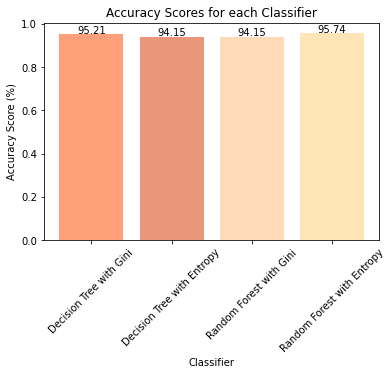

In [37]:
fig, ax = plt.subplots()

ax.bar(accuracyScoreLabels, accuracyScores, color = ['lightsalmon', 'darksalmon', 'peachpuff', 'moccasin'])
ax.set_title('Accuracy Scores for each Classifier')
ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy Score (%)')
plt.xticks(rotation=45)

xlocs, xlabs = plt.xticks()
for index, value in enumerate(accuracyScores):
    plt.text(xlocs[index] - 0.18, value + 0.0035, str(round(value*100, 2)), color='black')

plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.show()

We can see from above, that all models have **over a 90% accuracy score**. with the Random Forest with Entropy Impurity Measure Model being the most accurate. 

### ROC Curve to Visualize Model Performance

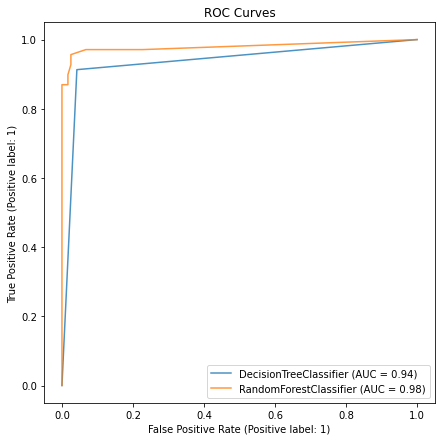

In [46]:
fig, ax = plt.subplots(figsize=(7, 7))
entropyDecisionTree_disp = plot_roc_curve(entropyDecisionTree, X_test, y_test, ax=ax,  alpha=0.8)
#giniDecisionTree_disp.plot(ax=ax, alpha=0.8)
giniRandomForest_disp = plot_roc_curve(giniRandomForest, X_test, y_test, ax=ax, alpha=0.8)
plt.title("ROC Curves")
plt.show()
#entropyRandomForest_disp = plot_roc_curve(entropyRandomForest, X_test, y_test, ax=ax, alpha=0.8, pos_label=1)

Here we plotted the ROC (Receiver Operating Characteristic) curves for two of our created models: **Decision Tree with Entropy Criterion**, and **Random Forest with Entropy Criterion**. 

We can see from the curve that the **false positive rate is low**, and the **true positive rate is high**, which means our models are performing well. 

Area Under the Curve (AUC) is another measure of model performance, which also has very high scores. 

Our Random Forest Classifier has a slightly higher AUC, which means it performs slightly better than our Decision Tree Classifier. 